In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [4]:
df_min=df[df['9']==1]

In [5]:
df_min.to_csv('wisconsin_minority_train.csv',index=False)
df_min=pd.read_csv('wisconsin_minority_train.csv')

In [6]:
df_majority=df[df['9']==0]
df_majority.to_csv('wisconsin_majority_train.csv',index=False)
df_majority=pd.read_csv('wisconsin_majority_train.csv')

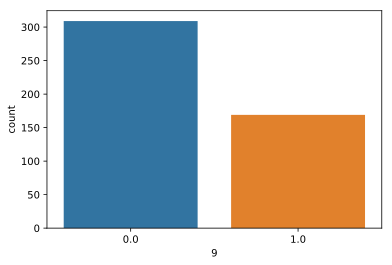

In [7]:
%matplotlib inline
sns.countplot(x='9',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(163, 5, 10)
(163, 10)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(10))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 2,690
Trainable params: 2,690
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
97/97 [==============================] - 4s 37ms/step - loss: 0.4088
Epoch 2/500
97/97 [==============================] - 0s 858us/step - loss: 0.3722
Epoch 3/500
97/97 [==============================] - 0s 713us/step - loss: 0.3367
Epoch 4/500
97/97 [==============================] - 0s 662us/step - loss: 0.3032
Epoch 5/500
97/97 [==============================] - 0s 734us/step - loss: 0.2717
Epoch 6/500
97/97 [==============================] - 0s 693us/step - loss: 0.2427
Epoch 7/500
97/97 [==============================] - 0s 786us/step - loss: 0.2154
Epoch 8/500
97/97 [==============================] - 0s 693us/step - loss: 0.1900
Epoch 9/500
97/97 [==============================] - 0s 667us/step - loss: 0.1669
Epoch 10/500
97/97 [==============================] - 0s 677us/step - loss: 0.1470
Epoch 11/500
97/97 [==============================] - 0s 672us/step - loss: 0.1303
Epoch 12/500
97/97 [==============================] - 0s 749us/step - loss: 0.1160
Epoch 13/500
9

97/97 [==============================] - 0s 672us/step - loss: 0.0870
Epoch 100/500
97/97 [==============================] - 0s 713us/step - loss: 0.0867
Epoch 101/500
97/97 [==============================] - 0s 682us/step - loss: 0.0870
Epoch 102/500
97/97 [==============================] - 0s 651us/step - loss: 0.0874
Epoch 103/500
97/97 [==============================] - 0s 651us/step - loss: 0.0875
Epoch 104/500
97/97 [==============================] - 0s 682us/step - loss: 0.0872
Epoch 105/500
97/97 [==============================] - 0s 682us/step - loss: 0.0867
Epoch 106/500
97/97 [==============================] - 0s 662us/step - loss: 0.0866
Epoch 107/500
97/97 [==============================] - 0s 775us/step - loss: 0.0865
Epoch 108/500
97/97 [==============================] - 0s 672us/step - loss: 0.0865
Epoch 109/500
97/97 [==============================] - 0s 641us/step - loss: 0.0867
Epoch 110/500
97/97 [==============================] - 0s 662us/step - loss: 0.0869
Epoch 

97/97 [==============================] - 0s 677us/step - loss: 0.0841
Epoch 197/500
97/97 [==============================] - 0s 703us/step - loss: 0.0840
Epoch 198/500
97/97 [==============================] - 0s 687us/step - loss: 0.0842
Epoch 199/500
97/97 [==============================] - 0s 730us/step - loss: 0.0841
Epoch 200/500
97/97 [==============================] - 0s 682us/step - loss: 0.0840
Epoch 201/500
97/97 [==============================] - 0s 641us/step - loss: 0.0840
Epoch 202/500
97/97 [==============================] - 0s 651us/step - loss: 0.0839
Epoch 203/500
97/97 [==============================] - 0s 703us/step - loss: 0.0838
Epoch 204/500
97/97 [==============================] - 0s 682us/step - loss: 0.0836
Epoch 205/500
97/97 [==============================] - 0s 672us/step - loss: 0.0835
Epoch 206/500
97/97 [==============================] - 0s 651us/step - loss: 0.0833
Epoch 207/500
97/97 [==============================] - 0s 693us/step - loss: 0.0833
Epoch 

97/97 [==============================] - 0s 765us/step - loss: 0.0813
Epoch 294/500
97/97 [==============================] - 0s 724us/step - loss: 0.0821
Epoch 295/500
97/97 [==============================] - 0s 662us/step - loss: 0.0821
Epoch 296/500
97/97 [==============================] - 0s 662us/step - loss: 0.0818
Epoch 297/500
97/97 [==============================] - 0s 641us/step - loss: 0.0817
Epoch 298/500
97/97 [==============================] - 0s 651us/step - loss: 0.0817
Epoch 299/500
97/97 [==============================] - 0s 651us/step - loss: 0.0817
Epoch 300/500
97/97 [==============================] - 0s 662us/step - loss: 0.0816
Epoch 301/500
97/97 [==============================] - 0s 682us/step - loss: 0.0814
Epoch 302/500
97/97 [==============================] - 0s 693us/step - loss: 0.0813
Epoch 303/500
97/97 [==============================] - 0s 672us/step - loss: 0.0813
Epoch 304/500
97/97 [==============================] - 0s 641us/step - loss: 0.0813
Epoch 

97/97 [==============================] - 0s 786us/step - loss: 0.0797
Epoch 391/500
97/97 [==============================] - 0s 899us/step - loss: 0.0800
Epoch 392/500
97/97 [==============================] - 0s 693us/step - loss: 0.0804
Epoch 393/500
97/97 [==============================] - 0s 641us/step - loss: 0.0800
Epoch 394/500
97/97 [==============================] - 0s 631us/step - loss: 0.0796
Epoch 395/500
97/97 [==============================] - 0s 672us/step - loss: 0.0791
Epoch 396/500
97/97 [==============================] - 0s 672us/step - loss: 0.0791
Epoch 397/500
97/97 [==============================] - 0s 662us/step - loss: 0.0791
Epoch 398/500
97/97 [==============================] - 0s 662us/step - loss: 0.0793
Epoch 399/500
97/97 [==============================] - 0s 672us/step - loss: 0.0793
Epoch 400/500
97/97 [==============================] - 0s 651us/step - loss: 0.0793
Epoch 401/500
97/97 [==============================] - 0s 693us/step - loss: 0.0797
Epoch 

97/97 [==============================] - 0s 698us/step - loss: 0.0774
Epoch 488/500
97/97 [==============================] - 0s 713us/step - loss: 0.0774
Epoch 489/500
97/97 [==============================] - 0s 651us/step - loss: 0.0773
Epoch 490/500
97/97 [==============================] - 0s 734us/step - loss: 0.0774
Epoch 491/500
97/97 [==============================] - 0s 641us/step - loss: 0.0774
Epoch 492/500
97/97 [==============================] - 0s 646us/step - loss: 0.0772
Epoch 493/500
97/97 [==============================] - 0s 625us/step - loss: 0.0772
Epoch 494/500
97/97 [==============================] - 0s 672us/step - loss: 0.0770
Epoch 495/500
97/97 [==============================] - 0s 651us/step - loss: 0.0768
Epoch 496/500
97/97 [==============================] - 0s 662us/step - loss: 0.0766
Epoch 497/500
97/97 [==============================] - 0s 662us/step - loss: 0.0765
Epoch 498/500
97/97 [==============================] - 0s 641us/step - loss: 0.0764
Epoch 

In [14]:
model.save('7-24-2019-wisconsin-v1.h5')

In [15]:
Xtrain.shape

(97, 5, 10)

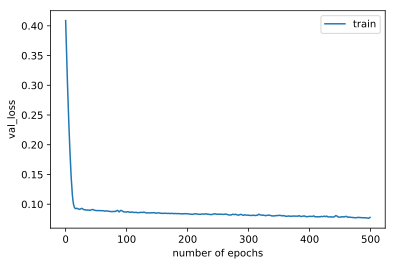

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

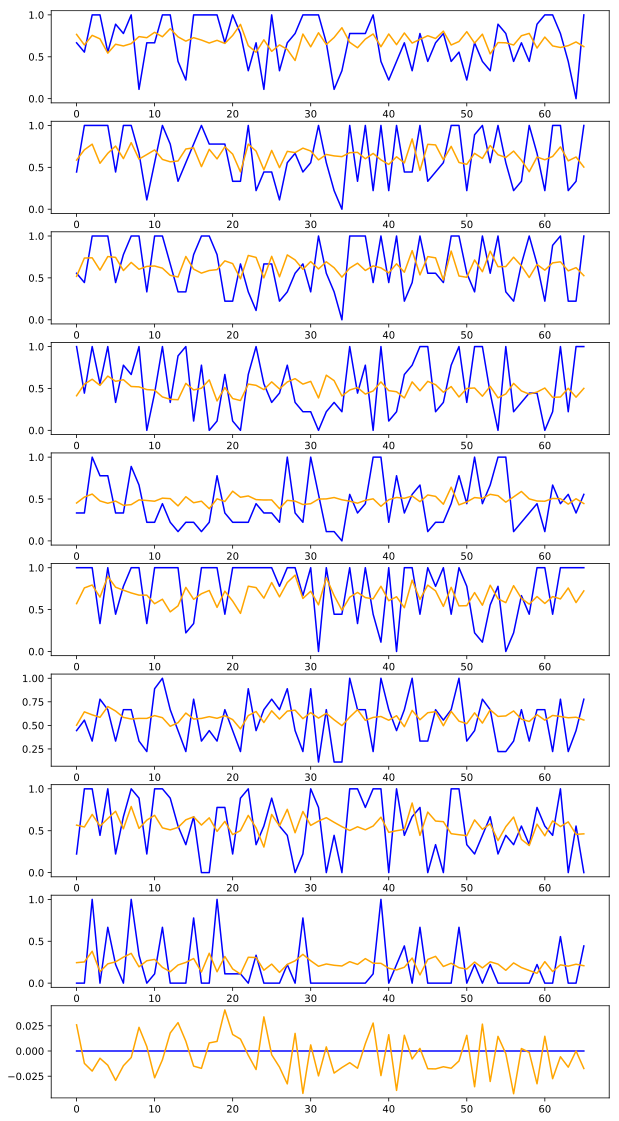

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 7.6707327e-01,  5.8663678e-01,  5.1816219e-01,  4.1271430e-01,
         4.5213217e-01,  5.7080543e-01,  5.0194353e-01,  5.6664848e-01,
         2.4470563e-01,  2.5999837e-02],
       [ 6.4088118e-01,  7.0925558e-01,  7.3674035e-01,  5.5084753e-01,
         5.2310246e-01,  7.5872409e-01,  6.4373386e-01,  5.4449290e-01,
         2.5324678e-01, -1.2290314e-02],
       [ 7.5573456e-01,  7.7658093e-01,  7.4000651e-01,  6.0988706e-01,
         5.5918008e-01,  7.9358000e-01,  6.1174470e-01,  6.9450295e-01,
         3.8047463e-01, -1.9935429e-02],
       [ 7.1387666e-01,  5.4846543e-01,  5.9298313e-01,  5.3633726e-01,
         4.7710994e-01,  6.4866197e-01,  5.8565754e-01,  5.5510557e-01,
         1.3753048e-01, -7.2168559e-03],
       [ 5.4331368e-01,  6.6730243e-01,  7.5470519e-01,  6.4759374e-01,
         4.4918796e-01,  8.9546907e-01,  6.9998777e-01,  6.4486426e-01,
         2.3044384e-01, -1.4119886e-02],
       [ 6.4956814e-01,  7.5390363e-01,  7.4521929e-01,  5.8536541e-01,
   

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

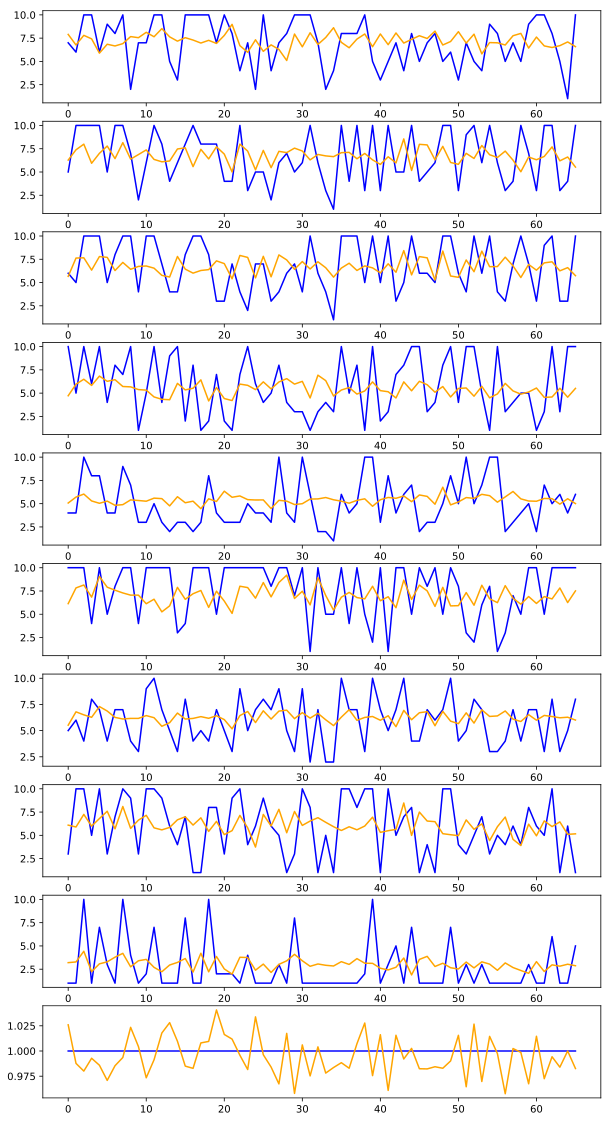

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 7.6707327e-01,  5.8663678e-01,  5.1816219e-01,  4.1271430e-01,
         4.5213217e-01,  5.7080543e-01,  5.0194353e-01,  5.6664848e-01,
         2.4470563e-01,  2.5999837e-02],
       [ 6.4088118e-01,  7.0925558e-01,  7.3674035e-01,  5.5084753e-01,
         5.2310246e-01,  7.5872409e-01,  6.4373386e-01,  5.4449290e-01,
         2.5324678e-01, -1.2290314e-02],
       [ 7.5573456e-01,  7.7658093e-01,  7.4000651e-01,  6.0988706e-01,
         5.5918008e-01,  7.9358000e-01,  6.1174470e-01,  6.9450295e-01,
         3.8047463e-01, -1.9935429e-02],
       [ 7.1387666e-01,  5.4846543e-01,  5.9298313e-01,  5.3633726e-01,
         4.7710994e-01,  6.4866197e-01,  5.8565754e-01,  5.5510557e-01,
         1.3753048e-01, -7.2168559e-03],
       [ 5.4331368e-01,  6.6730243e-01,  7.5470519e-01,  6.4759374e-01,
         4.4918796e-01,  8.9546907e-01,  6.9998777e-01,  6.4486426e-01,
         2.3044384e-01, -1.4119886e-02],
       [ 6.4956814e-01,  7.5390363e-01,  7.4521929e-01,  5.8536541e-01,
   

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)